# <center> El perceptrón </center>
Tratando de averiguar cómo funcina el cerebro biológico, [Warren McCullock](https://es.wikipedia.org/wiki/Warren_McCulloch) y [Walter Pitts](https://es.wikipedia.org/wiki/Walter_Pitts) publicaron el primer concepto de una celda de cerebro simplificada, la llamada *neurona McCullocks-Pitts* (MCP), en 1943 ([(W. S. McCulloch and W. Pitts. *A Logical
Calculus of the Ideas Immanent in Nervous Activity*](http://www.cs.cmu.edu/~./epxing/Class/10715/reading/McCulloch.and.Pitts.pdf)).

![neurona MCP](images/mccullock_pitts_neuron.jpg)

Ellos describieron una célula nerviosa con una puerta lógica simple con salidas binarias. Múltiples señales llegan a las dendritas, se integran en el cuerpo de la célula y, si la señal acumulada excede cierto umbral, la señal de salida es es generada y pasará por el axón.

Sólo unos años más tarde, [Frank Rosenblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt) publicó el primer concepto de una regla de aprendizaje de perceptrones básada en el modelo de neurona McCullock-Pitts ([F. Rosenblatt, *The Perceptron, a
Perceiving and Recognizing Automaton*. Cornell Aeronautical Laboratory, 1957](https://blogs.umass.edu/brain-wars/files/2016/03/rosenblatt-1957.pdf)). Rosenblatt propuso un algoritmo que aprendería automáticamente los coeficientes de pesos óptimos que luego serían multiplicados por las características de entrada en orden de tomar una decisión dependiendo de si la neurona era disparada o no. En el contexto del aprendizaje automático y la clasificación, tal algoritmo podría ser usado para predecir si una muestra pertenecía a una clase o a otra.

![perceptron](images/perceptron.png)

Más formalmente, podemos poner este problema como una tarea de clasificación binaria en la cual nos referimos a dos clases como 1 (positiva) y -1 (negativa), por simplicidad. Luego podemos definir una función de activación $\phi(z)$ que toma una combinación lineal de ciertos valores de entrada $\pmb{x}$ y un vector de peso correspondiente $\pmb{w}$, donde $z$ es la denominada entrada neta ($z = w_1 x_1 + \ldots + w_m x_m$).
<center>$\pmb{w} = \begin{bmatrix}w_1 \\ \vdots \\ w_m \end{bmatrix}, \pmb{x} = \begin{bmatrix}x_1 \\ \vdots \\ x_m \end{bmatrix}$</center>

Ahora, si la activación de una muestra particular $x^{(i)}$, esto es, si la salida de $\phi(z)$ es mayor al umbral definido $\theta$, predecimos la clase 1, si no, la clase -1:
<center>$\phi(z) = \left \{ \begin{matrix} 1 & \mbox{si }z \ge \theta \\ -1 & \mbox{de otra forma} \end{matrix}\right.$</center>

Por simplicidad, podemos llevar al umbral $\theta$ al lado izquierdo de la ecuación y definir un peso 0 como $w_0 = - \theta$ y $x_0 = 1$, por lo que escribimos $\pmb{z}$ de una forma más compacta:

<center>$z = w_0 x_0 + w_1 x_1 + \ldots + w_m x_m = \pmb{w}^T \pmb{x}$</center>

>Si te pierdes con los conceptos matemáticos sobre matrices consulta esta [carpeta sobre álgebra lineal](https://github.com/mondeja/fullstack/blob/master/backend/src/001-matematicas/teoria_practica/algebra_aritmetica/algebra_lineal).

### Regla de aprendizaje del perceptrón
La idea general detrás del modelo de neurona MCP y el modelo de perceptrón con umbral de Rosenblatt es usar una aproximación reduccionista a imitar como funciona una neurona en el cerebro: se dispara o no. Así, la regla inicial del perceptrón de Rosenblatt es bastante simple y puede ser resumida en los siguientes pasos:

1. Inicializar los pesos a 0 o a números aleatorios muy pequeños.
2. Por cada muestra de entrenamiento $\pmb{x}^{(i)}$ realizar los siguientes pasos:
    1. Calcular el valor de salida $ŷ$.
    2. Actualizar los pesos.

Aquí la salida es la etiqueta anteriormente predicha por la función de salto unitario que hemos definido anteriormente y la actualización simultánea de cada peso $w_j$ en el vector de pesos $w$ puede ser más formalmente escrita como:
$$w_j = w_j + \Delta w_j$$

El valor de $\Delta w_j$, el cual es usado para actualizar el peso $w_j$, es calculado por la **regla de aprendizaje del perceptrón**:

$$\Delta w_j = \eta(y^{(i)} - ŷ^{(i)}) x^{(i)}_j$$

donde $\eta$ es la tasa de aprendizaje (una constante entre 0.0 y 1.0), $y^{(i)}$ es la etiqueta objetiva (la verdadera) de la muestra de ejemplo número $i$, y la $ŷ^{(i)}$ es la etiqueta predicha. Es importante notar que todos los pesos en el vector de pesos son actualizados simultáneamente, lo que significa que no recalculamos la $ŷ^{(i)}$ antes de que todos los pesos $\Delta w_j$ han sido actualizados. Concretamente, para un conjunto de datos de 2 dimensiones, escribiríamos la actualización de esta forma:

$$\Delta w_0 = \eta(y^{(i)} - output^{(i)})$$

$$\Delta w_1 = \eta(y^{(i)} - output^{(i)}) x^{(i)}_1$$

$$\Delta w_2 = \eta(y^{(i)} - output^{(i)}) x^{(i)}_2$$

Así, en los escenarios donde el perceptrón predice la etiqueta correctamente, los pesos se mantienen sin cambio:

$$\Delta w_j = \eta(-1^{(i)} - - 1^{(i)}) x^{(i)}_j = 0$$

$$\Delta w_j = \eta(1^{(i)} - 1^{(i)}) x^{(i)}_j = 0$$

Sin embargo, en el caso de una predicción incorrecta, los pesos son empujados hacia la dirección de la etiqueta positiva o negativa, respectivamente:

$$\Delta w_j = \eta(1^{(i)} - - 1^{(i)}) x^{(i)}_j = \eta(2)x_j$$

$$\Delta w_j = \eta(- 1^{(i)} - 1^{(i)}) x^{(i)}_j = \eta(-2)x_j$$


________________________________________
### Implemetación de un perceptrón


In [1]:
import numpy as np

class Perceptron:
    """Clasificador perceptrón
    
    Args:
        eta (float): Tasa de aprendizaje
            (entre 0.0 y 1.0)
        n_iter (int): Pasadas sobre el conjunto
            de datos de entreanamiento
    
    Attrs:
        w_ (1d-array): Pesos después de ajustar.
        errors_ (list): Número de clasificaciones
            erróneas en cada paso.
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta  # Es el nombre de la letra griega dada a la tasa de entrenamiento
        self.n_iter = n_iter
    
    def fit(self, X, y):
        """Ajuste de los datos de entrenamiento
        
        Args:
            X (array): Vectores de entrenamiento,
                matriz con [n_samples, n_features]
            y (array): Valores objetivo, con forma [n_samples]
        
        Returns: self (object)
        """
        # Vector de 0s de una fila y el número de columnas de X + 1 (el umbral):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        #print(X) # Matriz de entrenamiento (características de las muestras)
        #print(y) # Objetivo
        
        for _ in range(self.n_iter): # Número de iteraciones
            errors = 0
            for xi, target in zip(X, y):
                # Le pasamos cada fila de la matriz X
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            # print(self.w_)  # Pesos
            self.errors_.append(errors)
        return self
        
    def net_input(self, xi):
        """Calcular la entrada neta"""
        return np.dot(xi, self.w_[1:]) + self.w_[0]
    
    def predict(self, xi):
        """Predecir si el valor superó (devuelve 1) 
        o no (devuelve -1) el umbral 0.0"""
        return np.where(self.net_input(xi) >= 0.0, 1, -1)

>La función `np.dot()` [multiplica dos matrices](https://github.com/mondeja/fullstack/blob/master/backend/src/001-matematicas/teoria_practica/algebra_aritmetica/algebra_lineal/matrices.ipynb) y la función `np.where()` actúa de la [siguiente forma](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.where.html): si se cumple la condición otorgada al primer parámetro, devuelve el segundo parámetro, si no devuelve el tercero. 

________________________________________________

Para implementar el perceptrón usaremos el [dataset iris](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). Extraeremos dos de las tres clases de flores que incluye, Setosa y Versicolour y consideraremos el largo de sépalo y de pétalo.

> Sin embargo, la regla del perceptrón no está restringida a dos dimensiones y el algoritmo del perceptrón puede extenderse para implementar clasificaciones multiclase.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

# Cargamos el dataset Iris de sklearn
iris = datasets.load_iris()
# Descripción del dataset (descomentar)
#print(iris["DESCR"])

# Lo convertimos a DataFramde de pandas
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df.shape   # 150 muestras (50 de cada tipo de flor)

# Correspondencia de tipos de flores y numeros en iris.target:
#    0 Iris Setosa
#    1 Iris Versicolour
#    2 Iris Virginica

(150, 5)

Ahora extraemos las 100 etiquetas de clases que corresponden a las 50 *Iris Setosa* y 50 *Iris Versicolor*, respectivamente. Entonces convertimos las etiquetas de clase en los enteros 1 (Versicolor) y -1 (Setosa).

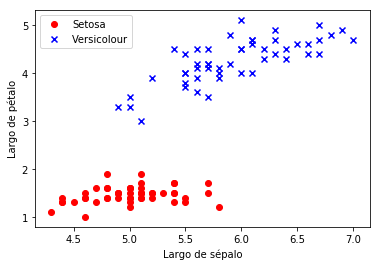

In [3]:
# Extraemos las primeras 100 flores
y = df.iloc[0:100, 4].values

# Donde la etiqueta de flor sea 0 (Setosa) ponle -1, si no 1
y = np.where(y == 0, -1, 1)

# Extraemos el largo de sépalo (0) y de pétalo (2) 
X = df.iloc[:100, [0, 2]].values

# Dibujamos Iris Setosa
plt.scatter(X[:50, 0], X[:50, 1], c="red", marker="o", label="Setosa")

# Dibujamos Iris Versicolour
plt.scatter(X[50:100, 0], X[50:100, 1], c="blue", marker="x", label="Versicolour")

plt.xlabel("Largo de sépalo (cm)")
plt.ylabel("Largo de pétalo (cm)")
plt.legend()
plt.show()


Ahora entrenamos el algoritmo del perceptrón en el subconjunto de datos que hemos extraido. También, vamos a dibujar el error de clasificación para cada iteración para comprobar si el algoritmo convergió y encontró un límite de decisión que separe las dos clases de flores:

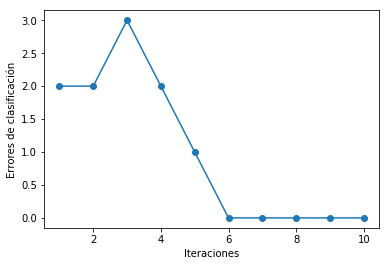

In [4]:
ppn = Perceptron() # Inicializamos el perceptrón
ppn.fit(X, y)      # Ajustamos el modelo
# Dibujamos el número de errores por iteración
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")

plt.xlabel("Iteraciones")
plt.ylabel("Errores de clasificación")
plt.show()

El perceptrón converge a partir de la 6ª iteración y a partir de ahí es capaz de clasificar las muestras perfectamente. 

_________________________________________

En el siguiente gif podemos observar como se produce el entrenamiento de un perceptrón. El punto que se va moviendo de lugar representa los pesos:

![perceptron entrenando](images/perceptron_training.gif)

[Desde aquí](http://www.emergentmind.com/the-perceptron) puedes observar otra interesante simulación animada.

____________________________________________________________________________

Vamos a implementar una pequeña función para visualizar los límites de decisión para conjuntos de datos de 2 dimensiones:

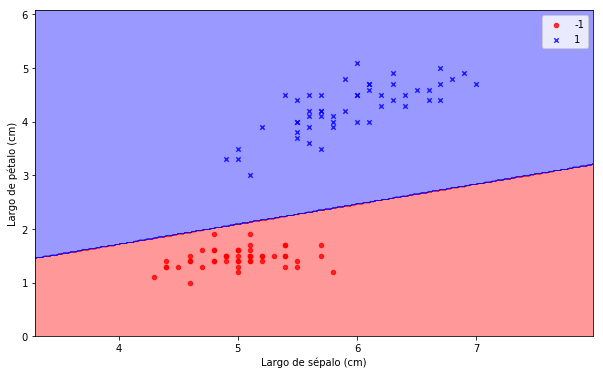

In [30]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Establecemos el generador de marcas y el mapa de colores
    marcadores = ("o", "x", "s", "^", "v")
    colores = ("red", "blue", "lightgreen", "gray", "cyan")
    
    # De la lista de colores
    #print(colores[0:len(np.unique(y))])  # ("red", "blue")
    cmap = ListedColormap(colores[0:len(np.unique(y))])
    
    # Dibujamos la superficie de decisión:
    # X[:, 0] # De todas las filas (:), de la columna de sépalos (0), el mínimo (min())
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Malla de grilla de mínimos y máximos de las columnas de X, dada una resolución
    # (Descomentar la siguiente línea para saber como función la función np.meshgrid())
    #print( np.meshgrid(np.arange(1, 2, 0.2), np.arange(1, 2, 0.1)) )
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # Figura
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Dibujamos el contorno relleno con las grillas
    ax.contourf(xx1, xx2, Z, alpha=.4, cmap=cmap) # Alpha es la opacidad
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Dibujamos las muestras
    for idx, cls in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cls, 0], y=X[y == cls, 1],
                   alpha=.8, c=cmap(idx),
                   marker=marcadores[idx], label=cls, s=20)
    
    
plot_decision_regions(X, y, ppn)

plt.xlabel("Largo de sépalo (cm)")
plt.ylabel("Largo de pétalo (cm)")
plt.legend()
plt.show()


>La función `np.unique()` devuelve los valores únicos dentro de un array numpy. La función [`ravel()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ravel.html) devuelve un [array aplanado](https://github.com/mondeja/fullstack/tree/master/backend/src/algoritmos/arrays/aplanar_array). El [atributo `T`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.T.html) devuelve la transposición de la matriz siempre y cuando su dimension sea 2 o mayor, si no no hace nada (esa es su diferencia con la función `transpose()`. La función [`reshape()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html) cambia la forma de la matriz indicándole una nueva forma sin cambiar los datos.

> Las funciones [`contour()` y `contourf()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.contourf.html) de matplotlib dibujan contornos y contornos rellenos, respectivamente. 

### Limitaciones del perceptrón
La regla de aprendizaje del perceptrón sólo es capaz de converger si las clases pueden ser separadas por una línea, si no, los pesos nunca dejan de actualizarse a no se que establezcamos un límite máximo de iteraciones.

En 1969, [Marvin Minsky](https://es.wikipedia.org/wiki/Marvin_Minsky) y [Seymour Paper](https://es.wikipedia.org/wiki/Seymour_Papert) publicaron el libro [Perceptrones](https://en.wikipedia.org/wiki/Perceptrons_(book)), en el cual demostraron que un perceptrón no puede resolver una simple operación XOR ([disyunción exclusiva](https://es.wikipedia.org/wiki/Disyunci%C3%B3n_exclusiva)). La disyunción exclusiva en Python puede representarse de la forma:

In [34]:
A, B = True, False

print(A ^ A, A ^ B, B ^ A, B ^ B)

# También así:
print(A != A,  A != B,  B != A,  B != B)

# O más verbosamente
print(
    (A and not A),
    (A and not B) or (B and not A), # Y viceversa (es lo mismo)
    (B and not B)
)

False True True False
False True True False
False True False


Sólo es verdadera cuando los valores son diferentes. Podemos generar una tabla de verdad tal que:

|  *XOR*  | True     |   False   |
|---------|----------|-----------|
|**True** | False    | True      |
|**False**| True     | False     |

El perceptrón no sería capaz de separar los pesos, ya que sus respuestas se basan en el salto de un umbral. Para solucionarlo se usa una red de neuronas a la cual se denomina [perceptrón multicapa]():

![Perceptron multicapa](https://s20.postimg.org/p66hy57pp/perceptron_multicapa.png)

>Fuentes:
- [Python Machine Learning - Sebastian Raschka](https://mega.nz/#!U7pG3YAD!SqBHrAWdavkiFEwNz2yv8pE9N0Q6kQ_jNj3fxCa8H3g.zip)
- [Mutlilayer perceptron (Part 1) - The nature of code](https://www.youtube.com/watch?v=u5GAVdLQyIg)